## Implementing the first derivative $f'(x)$ of the function:
$$f(x)=e^x+sin(x)$$
Using the following formula to approximate $f'(x)$:
$$f'(x_i)=\frac{f(x_{i+1})-f(x_{i-1})}{2h}-O(h^2)$$

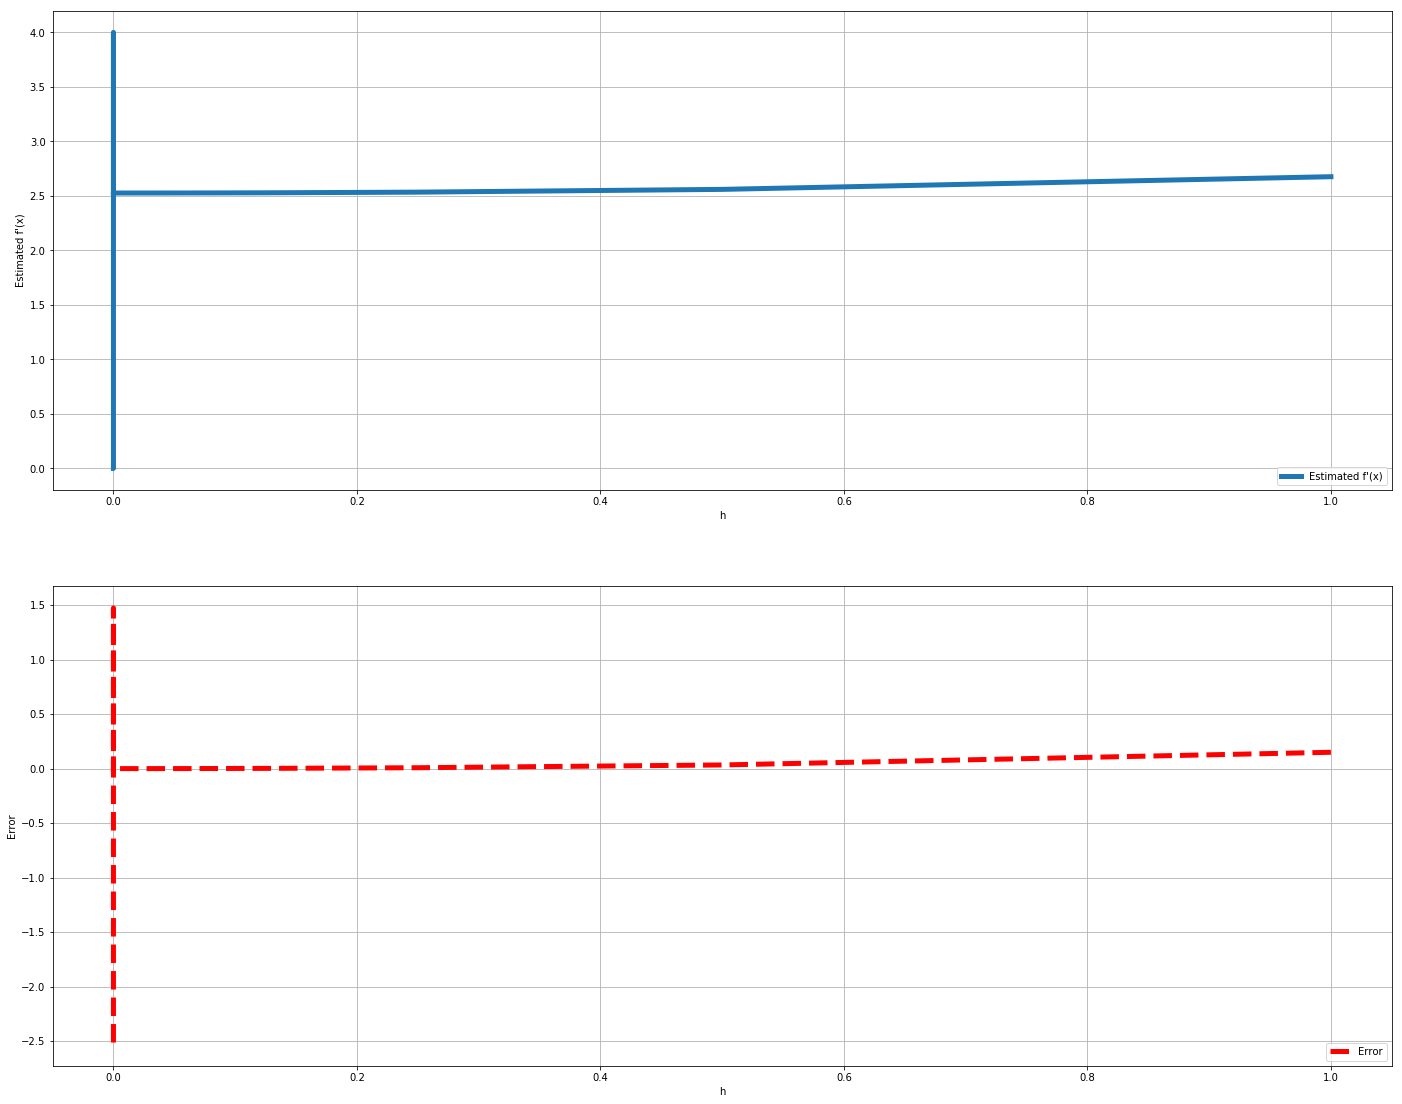

In [50]:
import numpy as np
import matplotlib.pyplot as plt

h = [1 / (2 ** n) for n in range(60)]
f_deriv_actual = np.exp(0.5) + np.cos(0.5) # The actual value of f'(0.5)

f_estimate = []
error      = []
for sub_h in h:
    f_xPlusOne  = np.exp(0.5 + sub_h) + np.sin(0.5 + sub_h) # First term
    f_xMinusOne = np.exp(0.5 - sub_h) + np.sin(0.5 - sub_h) # Second term
    
    f_estimate.append((f_xPlusOne - f_xMinusOne) / (2 * sub_h)) # Add to list
    error.append((f_xPlusOne - f_xMinusOne) / (2 * sub_h) - f_deriv_actual)

h_np     = np.array(h)
f_est_np = np.array(f_estimate)
error_np = np.array(error)

# Graph 1
plt.figure(figsize=(24, 16))
plt.subplot(3, 1, 1)
plt.plot(h_np, f_est_np, label="Estimated f'(x)", linewidth = 5)
plt.ylabel("Estimated f'(x)")
plt.xlabel("h")
plt.grid(True)
plt.legend(loc='lower right')

# Graph 2
plt.subplot(3, 1, 2)
plt.plot(h_np, error_np, "--r", label="Error", linewidth = 5)
plt.ylabel("Error")
plt.xlabel("h")
plt.grid(True)
plt.legend(loc='lower right')

plt.show()

As is quite evident in both plots, both the estimated $f'(x)$ and the error of that estimation, practically _explode_ in value as h nears zero. Looking at the equation...
$$f'(x_i)=\frac{f(x_{i+1})-f(x_{i-1})}{2h}-O(h^2)$$
the reason for this is quite clear. As h nears zero, the values of $f(x_{i+1})$ and $f(x_{i-1})$ become nearly equivalent. When subtracting these two nearly identical numbers, the imprecision of floating point representation becomes quite apparant. If there is any cancellation error due to the binary representation of either value, the resulting difference will be quite large, and then amplified even before by the division of such a small number as $2h$. This result is compounded by the truncation error of our _estimation_, given that the above formula is **not** the actual derivative of $f(x)$, only an estimation. This manifests as counter-intuitive behavior as h becomes very small. 